In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import requests, json
import datetime
import pytz
import csv
import time


In [ ]:

apiKey = "0bb972aaf00b7dddb4a72d5aed9e8ae9"
baseURL = "https://api.openweathermap.org/data/2.5/weather?q="
cityName = "gwalior"
completeURL = baseURL + cityName + "&appid=" +apiKey
response = requests.get(completeURL)
data = response.json()
with open("rainfalldata_5.csv","w",newline="")as f:
   data_=csv.writer(f)
   header = ["Time","weather","temperature","humidity","wind_pressure","wind_speed","wind_direction"]
   Time = datetime.datetime.now(pytz.timezone('Asia/Kolkata'))
   weather=data["weather"][0]["id"]
   temperature=data["main"]["temp"]
   humidity=data["main"]["humidity"]
   wind_pressure=data["main"]["pressure"]
   wind_speed=data["wind"]["speed"]
   wind_direction=data["wind"]["deg"]
   data_.writerow(header)
   data_.writerow([Time,weather,temperature,humidity,wind_pressure,wind_speed,wind_direction])



In [ ]:

current_time = datetime.datetime.now(pytz.timezone('Asia/Kolkata'))
print(current_time)



2023-10-31 22:21:21.652384+05:30


In [ ]:
def data_set():
   with open("rainfalldata_5.csv","a",newline="")as f:
        data_=csv.writer(f)
        Time = datetime.datetime.now(pytz.timezone('Asia/Kolkata'))
        weather=data["weather"][0]["id"]
        temperature=data["main"]["temp"]
        humidity=data["main"]["humidity"]
        wind_pressure=data["main"]["pressure"]
        wind_speed=data["wind"]["speed"]
        wind_direction=data["wind"]["deg"]
        data_.writerow([Time,weather,temperature,humidity,wind_pressure,wind_speed,wind_direction])

In [ ]:
while(True):
    data_set()
    time.sleep(1)

KeyboardInterrupt: ignored

In [ ]:
df=pd.read_csv('rainfalldata_5.csv')

In [ ]:
df

,Time,weather,temperature,humidity,wind_pressure,wind_speed,wind_direction
0,2023-10-31 22:21:16.756518+05:30,804,297.58,41,1015,1.48,100
1,2023-10-31 22:21:31.690950+05:30,804,297.58,41,1015,1.48,100
2,2023-10-31 22:21:32.692491+05:30,804,297.58,41,1015,1.48,100
3,2023-10-31 22:21:33.693784+05:30,804,297.58,41,1015,1.48,100
4,2023-10-31 22:21:34.695294+05:30,804,297.58,41,1015,1.48,100
...,...,...,...,...,...,...,...
129,2023-10-31 22:23:53.092133+05:30,804,297.58,41,1015,1.48,100
130,2023-10-31 22:23:54.092771+05:30,804,297.58,41,1015,1.48,100
131,2023-10-31 22:23:55.093773+05:30,804,297.58,41,1015,1.48,100
132,2023-10-31 22:23:56.094791+05:30,804,297.58,41,1015,1.48,100


Text(0.5, 0, 'parameters')

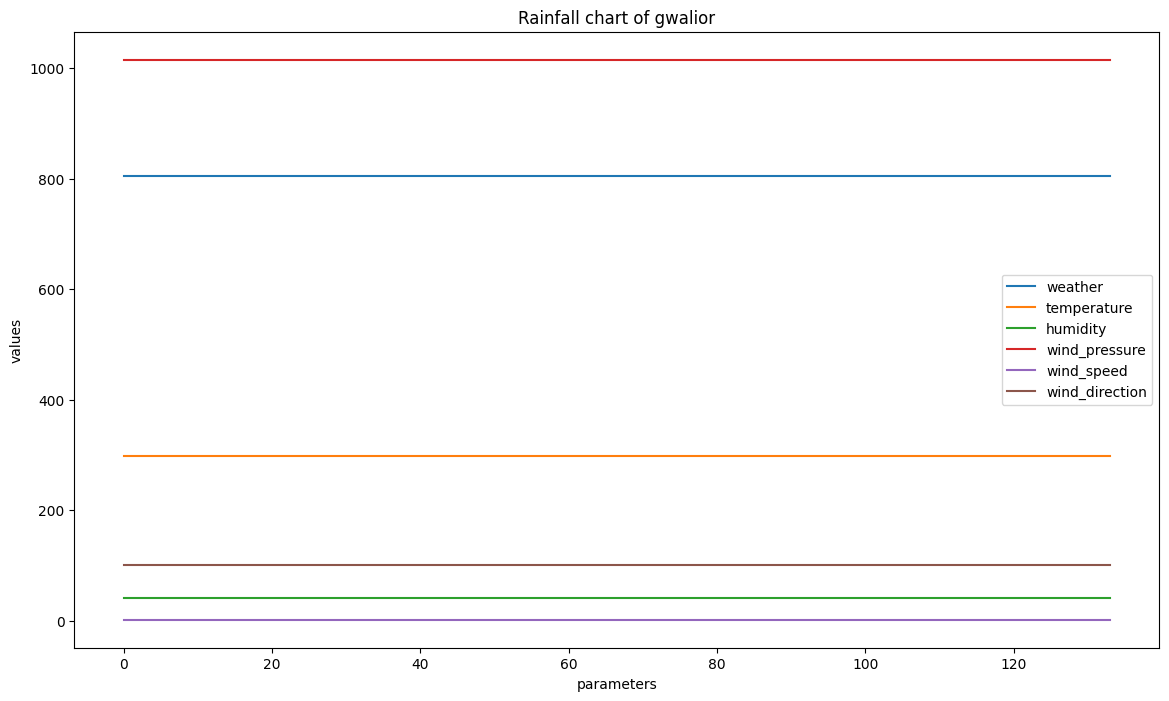

In [ ]:
df.plot(kind='line',figsize=(14,8))
plt.title('Rainfall chart of gwalior')
plt.ylabel('values')
plt.xlabel('parameters')

In [ ]:
train_dates=pd.to_datetime(df['Time'])

In [ ]:
train_dates

0      2023-10-29 06:59:44.222972+05:30
1      2023-10-29 07:00:01.582154+05:30
2      2023-10-29 07:00:02.583604+05:30
3      2023-10-29 07:00:03.585071+05:30
4      2023-10-29 07:00:04.586540+05:30
                     ...               
3595   2023-10-29 08:00:00.486716+05:30
3596   2023-10-29 08:00:01.488159+05:30
3597   2023-10-29 08:00:02.489691+05:30
3598   2023-10-29 08:00:03.491160+05:30
3599   2023-10-29 08:00:04.492651+05:30
Name: Time, Length: 3600, dtype: datetime64[ns, pytz.FixedOffset(330)]

In [ ]:
cols=list(df)[1:7]
print(cols)

['weather', 'temperature', 'humidity', 'wind_pressure', 'wind_speed', 'wind_direction']


<Axes: >

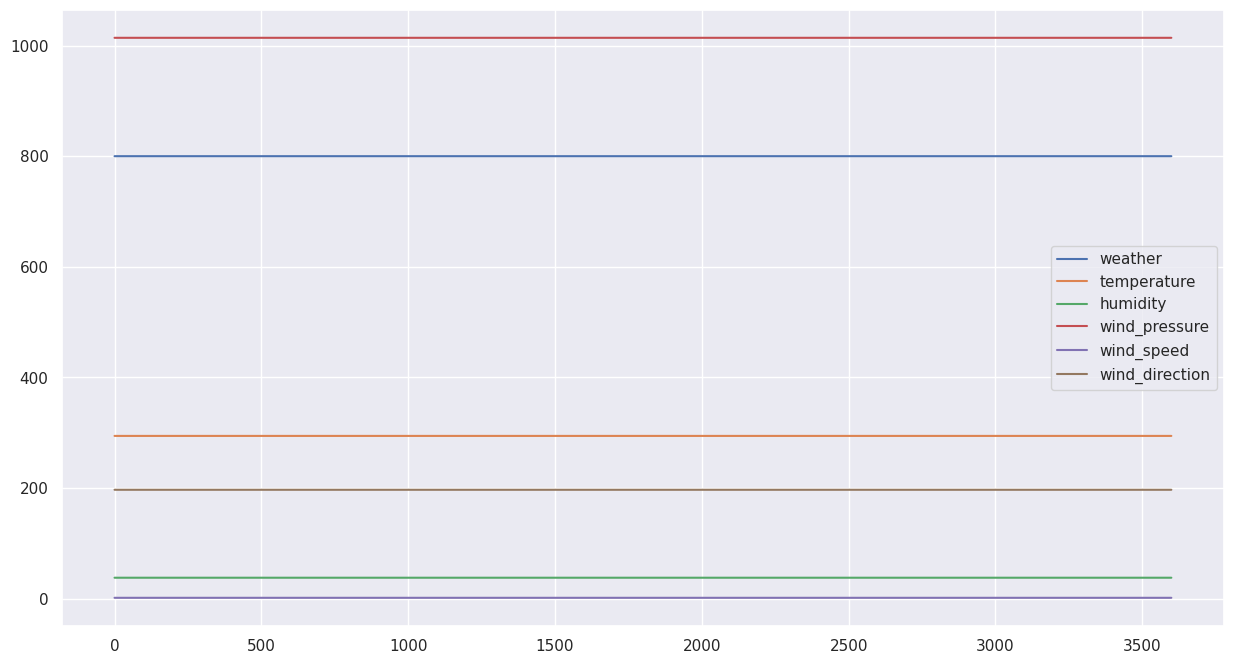

In [ ]:
training_df=df[cols].astype(float)
plot_df=training_df
plot_df.plot.line()

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar=scalar.fit(training_df)
training_df_scaled=scalar.transform(training_df)

In [ ]:
#Lists for storing the training data considering multiple variables
#trainX for storing training data (weather,temperature,humidity,wind_pressure,wind_speed,wind_direction)
#trainY for storing target values(weather)
trainX=[]
trainY=[]
#1m = 60 seconds
#1hour = 3600 seconds
#1day = 86400 seconds
#7days = 604800 seconds
# clear
n_past=180 #7 values will be considered to predict the next values
n_fut=180 #for predicting the next 100 value based on previous 20 values


#Adding the values to trainX and trainY lists
for i in range(n_past,len(training_df_scaled)-n_fut+1):
    trainX.append(training_df_scaled[i-n_past:i,0:training_df_scaled.shape[1]])
    trainY.append(training_df_scaled[i+n_fut-1:i+n_fut,0])

#Converting into numpy arrays
trainX,trainY=np.array(trainX),np.array(trainY)

print('trainX shape == {}'.format(trainX.shape))#Knowing the shape
#(364,20,4) means there are 364windows(groups) of 20*4


print('trainY shape == {}'.format(trainY.shape))
#There are 364 values from previous values

trainX shape == (3241, 180, 6)
trainY shape == (3241, 1)


In [ ]:
model=Sequential()
model.add(LSTM(32,activation='relu',input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(32,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(32,activation='relu',return_sequences=False))
model.add(Dropout(0.3))

model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 180, 32)           4992      
                                                                 
 dropout_6 (Dropout)         (None, 180, 32)           0         
                                                                 
 lstm_7 (LSTM)               (None, 180, 32)           8320      
                                                                 
 dropout_7 (Dropout)         (None, 180, 32)           0         
                                                                 
 lstm_8 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [ ]:
history=model.fit(trainX,trainY,epochs=10,batch_size=5,validation_split=0.2,verbose=1)

Epoch 1/30
519/519 [==============================] - 108s 200ms/step - loss: 3.2131e-09 - val_loss: 4.7352e-12
Epoch 2/30
519/519 [==============================] - 101s 195ms/step - loss: 4.2666e-12 - val_loss: 4.4438e-12
Epoch 3/30
519/519 [==============================] - 101s 195ms/step - loss: 5.2059e-10 - val_loss: 2.4521e-11
Epoch 4/30
519/519 [==============================] - 100s 193ms/step - loss: 7.2680e-10 - val_loss: 4.5558e-14
Epoch 5/30
519/519 [==============================] - 101s 195ms/step - loss: 6.7391e-10 - val_loss: 2.1223e-13
Epoch 6/30
519/519 [==============================] - 102s 196ms/step - loss: 7.1745e-10 - val_loss: 1.9748e-11
Epoch 7/30
519/519 [==============================] - 102s 197ms/step - loss: 8.9794e-10 - val_loss: 4.0177e-10
Epoch 8/30
519/519 [==============================] - 102s 196ms/step - loss: 8.6428e-10 - val_loss: 4.3461e-12
Epoch 9/30
519/519 [==============================] - 101s 194ms/step - loss: 5.0907e-10 - val_loss: 6.9

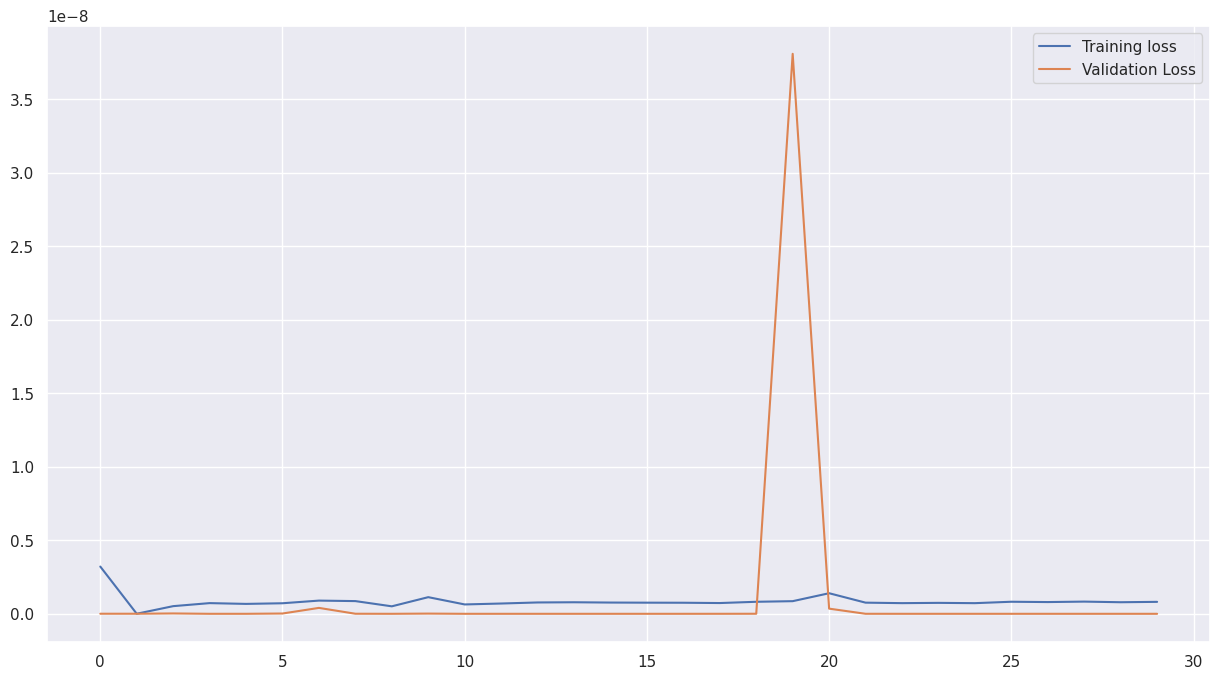

In [ ]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()

In [ ]:

#n_past is the row number corresponding to the start date or time
n_past = 1
#n_days_for_prediction is the row number corresponding to the end date or time
n_days_for_prediction=180

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq='S').tolist()

# make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
#Since we used 1 variables for transform, the inverse expects same dimensions
prediction_copies = np.repeat(prediction, training_df.shape[1], axis=-1)

y_pred_future = scalar.inverse_transform(prediction_copies)[:,0]
print(predict_period_dates)



6/6 [==============================] - 1s 80ms/step
[Timestamp('2023-10-29 08:00:04.492651+0530', tz='pytz.FixedOffset(330)', freq='S'), Timestamp('2023-10-29 08:00:05.492651+0530', tz='pytz.FixedOffset(330)', freq='S'), Timestamp('2023-10-29 08:00:06.492651+0530', tz='pytz.FixedOffset(330)', freq='S'), Timestamp('2023-10-29 08:00:07.492651+0530', tz='pytz.FixedOffset(330)', freq='S'), Timestamp('2023-10-29 08:00:08.492651+0530', tz='pytz.FixedOffset(330)', freq='S'), Timestamp('2023-10-29 08:00:09.492651+0530', tz='pytz.FixedOffset(330)', freq='S'), Timestamp('2023-10-29 08:00:10.492651+0530', tz='pytz.FixedOffset(330)', freq='S'), Timestamp('2023-10-29 08:00:11.492651+0530', tz='pytz.FixedOffset(330)', freq='S'), Timestamp('2023-10-29 08:00:12.492651+0530', tz='pytz.FixedOffset(330)', freq='S'), Timestamp('2023-10-29 08:00:13.492651+0530', tz='pytz.FixedOffset(330)', freq='S'), Timestamp('2023-10-29 08:00:14.492651+0530', tz='pytz.FixedOffset(330)', freq='S'), Timestamp('2023-10-29 0

In [ ]:
# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'Time':np.array(forecast_dates), 'weather':y_pred_future})
df_forecast['Time']=pd.to_datetime(df_forecast['Time'])


<ipython-input-116-749d2ded7588>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Time']=pd.to_datetime(original['Time'])


<Axes: xlabel='Time', ylabel='weather'>

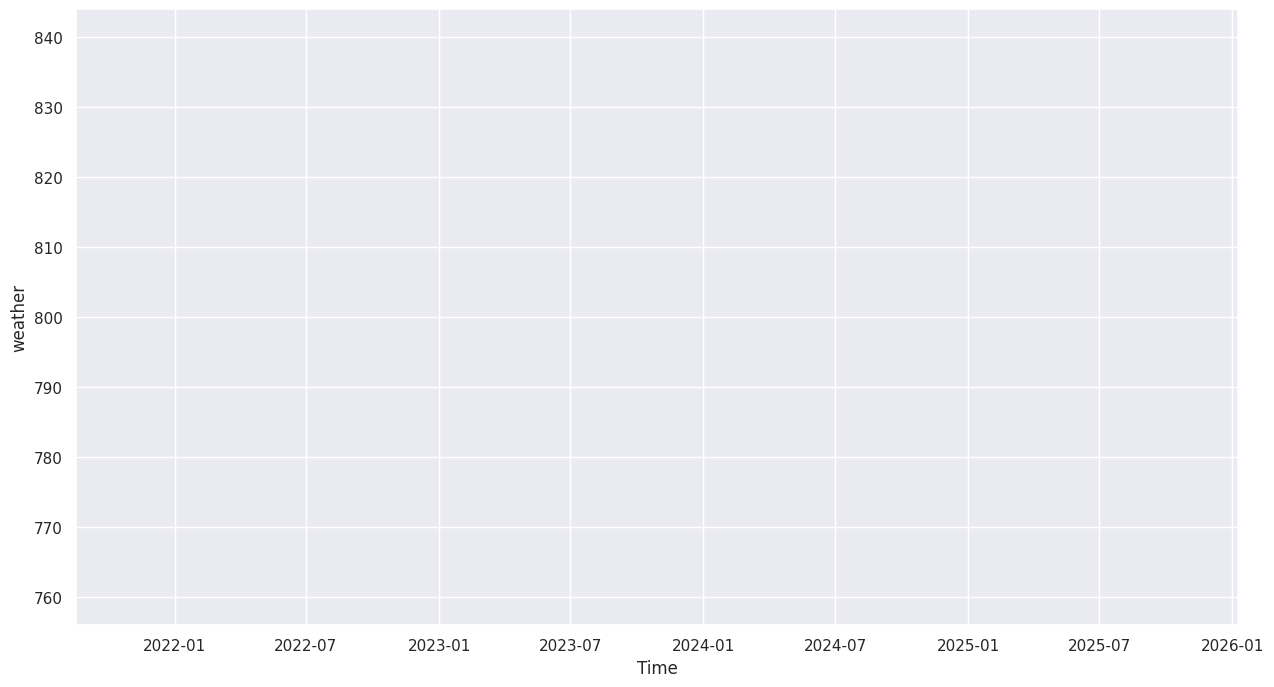

In [ ]:
import seaborn as sns

original = df[['Time', 'weather']]
original['Time']=pd.to_datetime(original['Time'])
original = original.loc[original['Time'] >= '2023-10-29 05:26:09.720238+05:30']

sns.lineplot(x="Time", y="weather", data=df_forecast)
#sns.lineplot(x="Time", y="weather", data=original)

In [ ]:
print("enter the weather value")
weather_value=input()
weather_value=int(weather_value)
#Group 2xx: Thunderstorm
if(weather_value==200):
 print("thunderstorm with light rain")
elif(weather_value==201):
 print("thunderstorm with rain")
elif(weather_value==202):
 print("thunderstorm with heavy rain")
elif(weather_value==210):
 print("light thunderstorm")
elif(weather_value==211):
 print("thunderstorm")
elif(weather_value==212):
 print("heavy thunderstorm")
elif(weather_value==221):
 print("ragged thunderstorm")
elif(weather_value==230):
 print("thunderstorm with light drizzle")
elif(weather_value==231):
 print("thunderstorm with drizzle")
elif(weather_value==232):
 print("thunderstorm with heavy drizzle")

#Group 3xx: Drizzle
elif(weather_value==300):
 print("light intensity drizzle")
elif(weather_value==301):
 print("drizzle")
elif(weather_value==302):
 print("heavy intensity drizzle")
elif(weather_value==310):
 print("light intensity drizzle rain")
elif(weather_value==311):
 print("drizzle rain")
elif(weather_value==312):
 print("heavy intensity drizzle rain")
elif(weather_value==313):
 print("shower rain and drizzle")
elif(weather_value==314):
 print("heavy shower rain and drizzle")
elif(weather_value==321):
 print("shower drizzle")

 #Group 5xx: Rain
elif(weather_value==500):
 print("light rain")
elif(weather_value==501):
 print("moderate rain")
elif(weather_value==502):
 print("heavy intensity rain")
elif(weather_value==503):
 print("very heavy rain")
elif(weather_value==504):
 print("extreme rain")
elif(weather_value==511):
 print("freezing rain")
elif(weather_value==520):
 print("light intensity shower rain")
elif(weather_value==521):
 print("shower rain")
elif(weather_value==522):
 print("heavy intensity shower rain")
elif(weather_value==531):
 print("ragged shower rain")

#Group 6xx: Snow
elif(weather_value==600):
 print("light snow")
elif(weather_value==601):
 print("snow")
elif(weather_value==602):
 print("heavy snow")
elif(weather_value==611):
 print("sleet")
elif(weather_value==612):
 print("light shower sleet")
elif(weather_value==613):
 print("shower sleet")
elif(weather_value==615):
 print("light rain and snow")
elif(weather_value==616):
 print("rain and snow")
elif(weather_value==620):
 print("light shower snow")
elif(weather_value==621):
 print("shower snow")
elif(weather_value==622):
 print("heavy shower snow")

#Group 7xx: Atmosphere
elif(weather_value==701):
 print("mist")
elif(weather_value==711):
 print("smoke")
elif(weather_value==721):
 print("haze")
elif(weather_value==731):
 print("sand/dust whirls")
elif(weather_value==741):
 print("fog")
elif(weather_value==751):
 print("sand")
elif(weather_value==761):
 print("dust")
elif(weather_value==762):
 print("volcanic ash")
elif(weather_value==771):
 print("squalls")
elif(weather_value==781):
 print("tornado")

#Group 800: Clear
elif(weather_value==800):

 print("clear sky")
#Group 80x: Clouds
elif(weather_value==801):
 print("few clouds: 11-25%")
elif(weather_value==802):
 print("scattered clouds: 25-50%")
elif(weather_value==803):
 print("broken clouds: 51-84%")
elif(weather_value==804):
 print("overcast clouds: 85-100%")
else:
  print("invalid")

enter the weather value
221
ragged thunderstorm
